In [1]:
import requests
import json
import time
import matplotlib.pyplot as plt

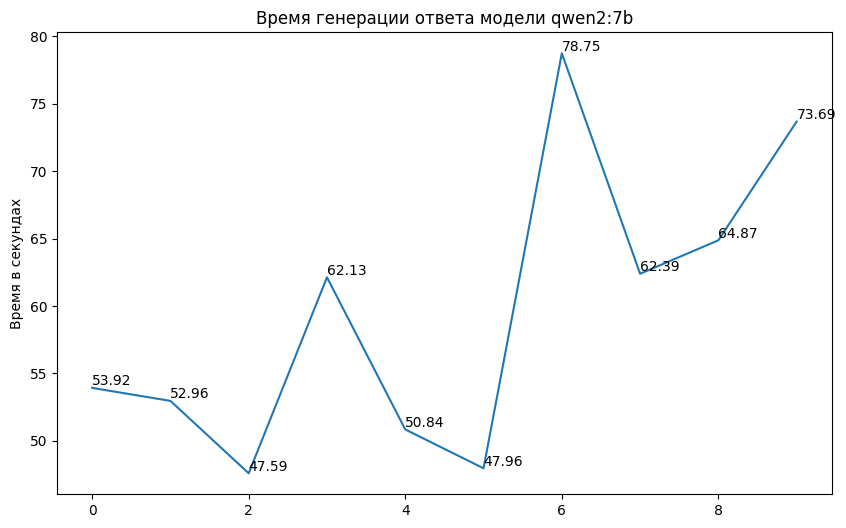

Среднее время генерации модели: 59.51


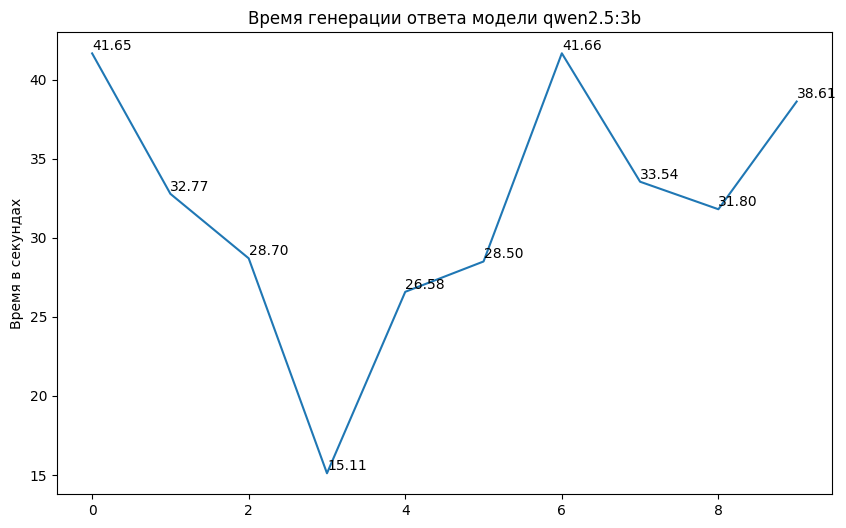

Среднее время генерации модели: 31.89


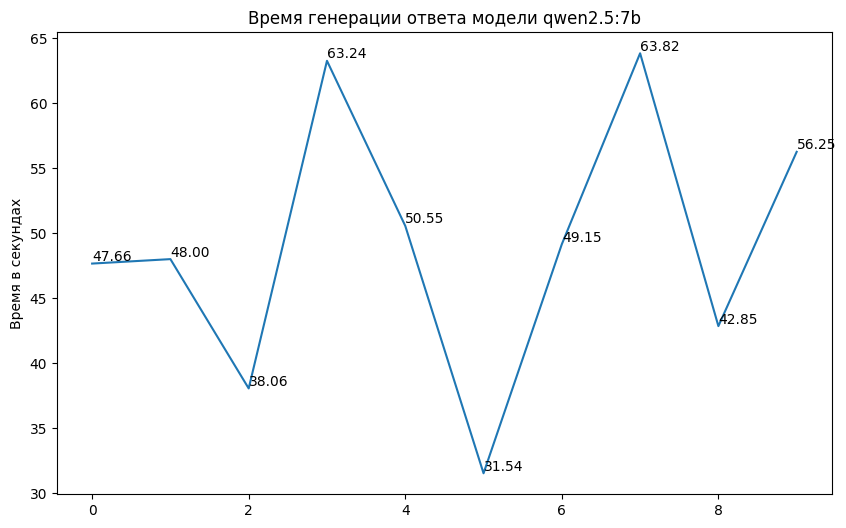

Среднее время генерации модели: 49.11


In [2]:
#  url для запроса
url = "http://localhost:11434/api/generate"
# данные для POST запроса
texts = []

with open('check_data.txt', 'r', encoding='utf-8') as file:
    texts = file.readlines()

all_model_time = []
model_names = ["qwen2:7b","qwen2.5:3b", "qwen2.5:7b"]

for model_name in model_names:
    av_time = 0
    time_list=[]

    for text in texts:
        data = {
            "model": model_name,
            "prompt": text,
            "stream": False,
            "options": {"seed": 111, "temperature": 0.3},
        }

        # отправка запроса и получение сырого текста с JSON словарем в response.text
        start_time = time.time()
        response = requests.post(url, json=data)
        response.raise_for_status()
        # преобразование JSON текста в словарь
        json_response = json.loads(response.text)
        end_time = time.time()
        elapsed_time = end_time - start_time
        av_time += elapsed_time
        time_list.append(elapsed_time)
     
    all_model_time.append(time_list)
    plt.figure(figsize=(10, 6))
    plt.plot(time_list)
    for i, t in zip(range(0,10), time_list):
        plt.text(i, t+0.2, f'{t:.2f}')
    plt.title('Время генерации ответа модели ' + model_name)
    plt.ylabel('Время в секундах')
    plt.show()
    print(f"Среднее время генерации модели: {av_time/10:.2f}")

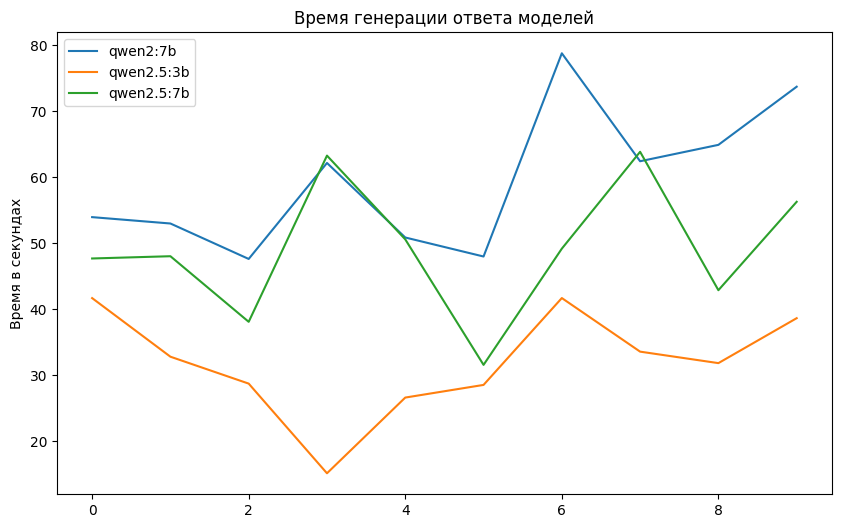

In [3]:
plt.figure(figsize=(10, 6))
for name, mt in zip(model_names,all_model_time):
    plt.plot(mt, label=name)
plt.title('Время генерации ответа моделей')
plt.legend()
plt.ylabel('Время в секундах')
plt.show()